In [4]:
# Module was created referencing '18-Unsupervised-Learning-Day2-Solved'


# Initial imports
import pandas as pd
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
# Load the crypto_data.csv dataset.
index_df = pd.read_csv(r'CMO-Monthly-Indices.csv', index_col = 0)
index_df.head()

,Energy,Non_Energy,Agriculture,Agriculture_Beverages,Agriculture_Food,Agriculture_Oils_Meals,Agriculture_Grains,Agriculture_Other_Food,Raw_Materials,Raw_Materials_Timber,Raw_Materials_Other,Fertilizers,Metals_Minerals,Metals_Minerals_Base_Metals,Precious_Metals
1960M01,2.13,18.82,22.03,25.44,21.19,23.17,23.58,16.44,22.33,16.24,29.00,12.86,12.90,14.07,3.27
1960M02,2.13,18.68,21.81,25.14,20.89,22.48,23.43,16.49,22.36,16.24,29.05,12.86,12.93,14.11,3.27
1960M03,2.13,18.67,21.90,24.64,21.06,22.18,23.75,17.15,22.54,16.24,29.43,12.86,12.72,13.86,3.27
1960M04,2.13,18.83,22.04,24.86,21.23,22.41,23.49,17.64,22.56,16.24,29.48,12.86,12.93,14.12,3.27
1960M05,2.13,18.77,22.05,24.84,21.09,22.05,23.85,17.32,22.97,16.24,30.33,12.86,12.73,13.87,3.27


In [7]:
index_df.isnull().sum(axis = 0)

Energy                         0
Non_Energy                     0
Agriculture                    0
Agriculture_Beverages          0
Agriculture_Food               0
Agriculture_Oils_Meals         0
Agriculture_Grains             0
Agriculture_Other_Food         0
Raw_Materials                  0
Raw_Materials_Timber           0
Raw_Materials_Other            0
Fertilizers                    0
Metals_Minerals                0
Metals_Minerals_Base_Metals    0
Precious_Metals                0
dtype: int64

In [8]:
index_scaled = StandardScaler().fit_transform(index_df)
print(index_scaled)

[[-1.00436704 -1.30948203 -1.40295964 ... -1.11147078 -1.16882819
  -0.97715772]
 [-1.00436704 -1.31450201 -1.41111893 ... -1.11047709 -1.16752441
  -0.97715772]
 [-1.00436704 -1.31486058 -1.40778104 ... -1.11743296 -1.17567303
  -0.97715772]
 ...
 [ 3.15819828  2.19947917  2.20827076 ...  1.7785285   1.83181877
   2.14356109]
 [ 3.21590413  2.20700913  2.16116937 ...  1.89975942  1.97751605
   2.21042658]
 [ 2.87141769  2.13386095  2.12556517 ...  1.7030076   1.78553462
   2.0596708 ]]


In [9]:
len(index_scaled)

753

In [10]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2, random_state=1)

# Get two principal components for the iris data.
index_pca = pca.fit_transform(index_scaled)

In [11]:
# Transform PCA data to a DataFrame
df_index_pca = pd.DataFrame(
    data=index_pca, columns=["principal component 1", "principal component 2"]
)
df_index_pca.head()

,principal component 1,principal component 2
0,-4.690962,-0.178428
1,-4.705041,-0.194421
2,-4.698133,-0.208398
3,-4.682865,-0.205610
4,-4.677656,-0.206239


In [12]:
1-sum(list(pca.explained_variance_ratio_))

0.08315698482604694

In [13]:
# Fetch the explained variance
total = 0
for x in pca.explained_variance_ratio_:
    total+=x
total

0.9168430151739531

In [14]:
pca.explained_variance_ratio_

array([0.88201243, 0.03483059])

## Running KMeans with PCA Data

C:\Users\Chapm\.conda\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


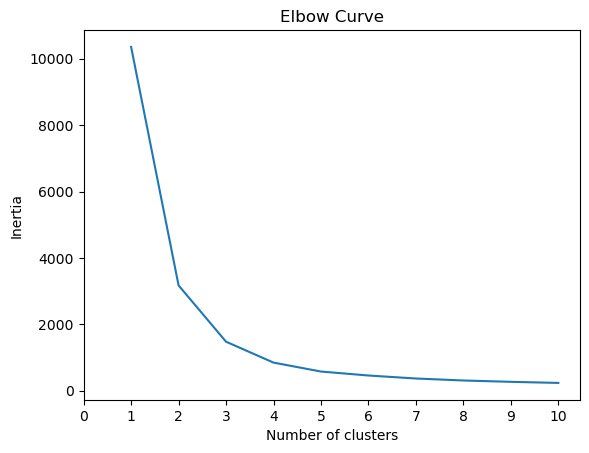

In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_index_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_index_pca)

# Predict clusters
predictions = model.predict(df_index_pca)

# Add the predicted class column to the dataframe
df_index_pca["class"] = model.labels_
df_index_pca.head()

,principal component 1,principal component 2,class
0,-4.690962,-0.178428,2
1,-4.705041,-0.194421,2
2,-4.698133,-0.208398,2
3,-4.682865,-0.205610,2
4,-4.677656,-0.206239,2


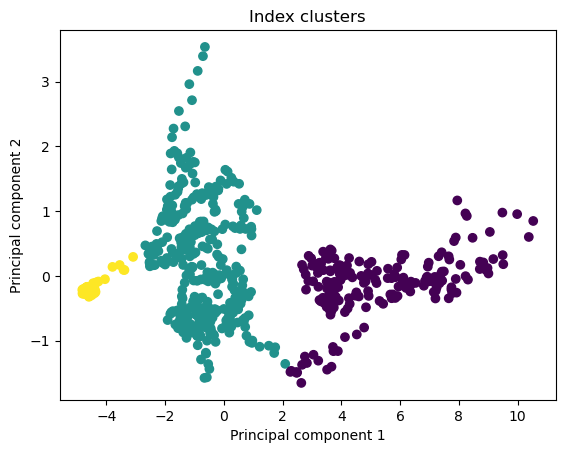

In [17]:
# Visualize the clusters
plt.scatter(x=df_index_pca['principal component 1'], y=df_index_pca['principal component 2'], c=df_index_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Index clusters')
plt.show()

In [18]:
df_index_pca.hvplot.scatter(x="principal component 1", y="principal component 2", color="class")

:Scatter   [principal component 1]   (principal component 2,class)

## Hierarchical Clustering

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import pandas as pd
import numpy as np
from pathlib import Path

In [20]:
labels = pd.DataFrame(index=index_df.index)

data = index_df.reset_index(drop=True)
data.head()

,Energy,Non_Energy,Agriculture,Agriculture_Beverages,Agriculture_Food,Agriculture_Oils_Meals,Agriculture_Grains,Agriculture_Other_Food,Raw_Materials,Raw_Materials_Timber,Raw_Materials_Other,Fertilizers,Metals_Minerals,Metals_Minerals_Base_Metals,Precious_Metals
0,2.13,18.82,22.03,25.44,21.19,23.17,23.58,16.44,22.33,16.24,29.00,12.86,12.90,14.07,3.27
1,2.13,18.68,21.81,25.14,20.89,22.48,23.43,16.49,22.36,16.24,29.05,12.86,12.93,14.11,3.27
2,2.13,18.67,21.90,24.64,21.06,22.18,23.75,17.15,22.54,16.24,29.43,12.86,12.72,13.86,3.27
3,2.13,18.83,22.04,24.86,21.23,22.41,23.49,17.64,22.56,16.24,29.48,12.86,12.93,14.12,3.27
4,2.13,18.77,22.05,24.84,21.09,22.05,23.85,17.32,22.97,16.24,30.33,12.86,12.73,13.87,3.27


In [21]:
len(labels)

753

In [22]:
mergings = linkage(data, method='ward')

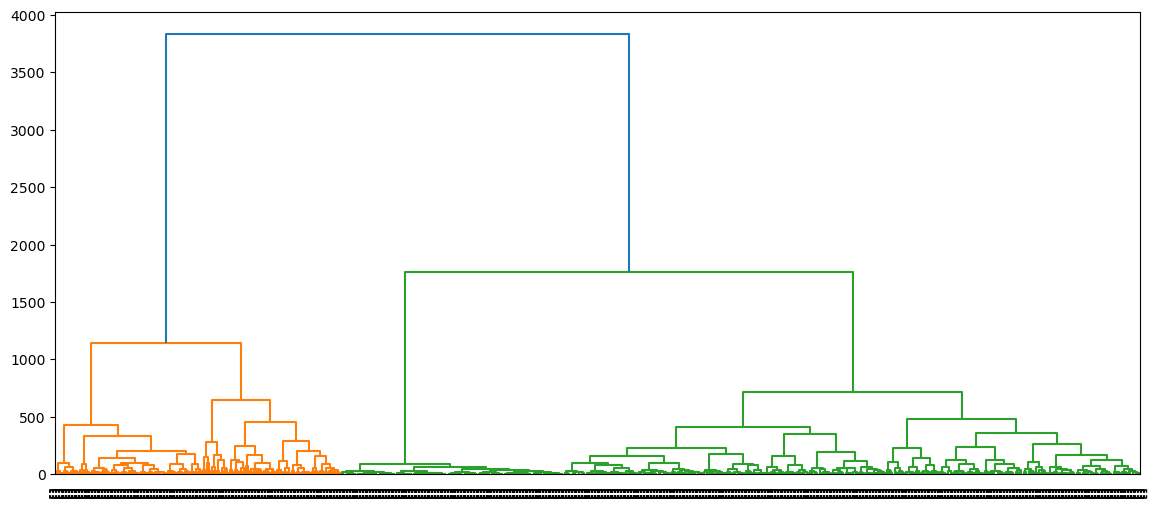

In [23]:
plt.figure(figsize=(14,6))
dendrogram(mergings,
          labels=np.array(labels),
          leaf_rotation=90,
          leaf_font_size=12)
plt.show()

### Testing below this line